In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
from ipyvizzu import Chart, Data, Config, Style
from IPython.display import display
import arabic_reshaper 
from bidi.algorithm import get_display
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [3]:
df = pd.read_csv("Riyadh_Aqqar_lands.csv")

In [5]:
ProfileReport(df,title='riyadh aqqar')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [316]:
df["المساحة"].value_counts().unique()
df[df["المساحة"] < 100]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
95,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
286,أرض,تجاري وسكني,الرياض,حي السلام,شرقية,1,1400.0,1400
360,أرض,سكني,امارة منطقة الرياض,الرياض,شرقية,90,3000.0,270000
600,أرض,سكني,الرياض,حي منفوحة الجديدة,شرقية,85,1400.0,119000
716,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
1446,أرض,تجاري وسكني,الرياض,حي النرجس,شرقية,1,1400.0,1400
1725,أرض,سكني,الرياض,حي الرمال,شمالية,36,2600.0,93600


In [317]:
df.shape

(2155, 8)

In [318]:
df["المدينة"].unique()
city_l = ['امارة منطقة الرياض ', 'الرياض', ' الرياض ']
df['المدينة'] = df['المدينة'].str.strip()

In [319]:
df["الحي"].unique()

array([' الرياض ', ' حي غرناطة ', ' حي اليرموك ', ' حي النسيم الغربي ',
       ' حي الرمال ', ' حي الملك فيصل ', ' حي المعيزلة ', ' حي الشرق ',
       ' حي المونسية ', ' حي الروضة ', ' حي المشرق ', ' حي الخليج ',
       ' حي الشهداء ', ' حي الحمراء ', ' حي البيان ', ' حي قرطبة ',
       ' حي القادسية ', ' حي النهضة ', ' حي الصناعية القديمة ',
       ' حي العلا ', ' حي الجنادرية ', ' حي المعيزيلة ', ' حي السعادة ',
       ' حي النسيم الشرقي ', ' حي خشم العان ', ' حي الصفا ',
       ' حي اشبيلية ', ' طريق سعيد ابن زيد ', ' حي القدس ',
       ' حي الاندلس ', ' حي الشعلة ', ' حي الندوة ', ' حي الفيحاء ', ' ',
       ' امارة منطقة الرياض ', ' حي المنار ', ' حي السلام ',
       ' حي الزاهر ', ' حي الجزيرة ', ' حي النظيم ', ' حي الازدهار ',
       ' حي الملز ', ' حي العارض ', ' حي النرجس ', ' العيينة ',
       ' حي الملقا ', ' حي الغنامية ', ' حي عرقة ', ' حي المهدية ',
       ' حي الدار البيضاء ', ' حي سلطانة ', ' حي الندى ', ' حي ظهرة لبن ',
       ' حي العين ', ' حي حطين ', ' حي الهدا ', '

In [320]:
df['الواجهة'].unique()

array(['غربية', 'شمالية', 'ثلاث شوارع', 'جنوبية', 'شرقية', 'شمالية شرقية',
       'جنوبية شرقية', 'جنوبية غربية', 'شمالية غربية', 'أربع شوارع'],
      dtype=object)

In [321]:
df[df['السعر الإجمالي'] > 50000000]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
97,أرض,سكني,الرياض,حي السعادة,غربية,22300,2700.0,60210000
255,أرض,تجاري وسكني,الرياض,حي العلا,ثلاث شوارع,24000,3000.0,72000000
389,أرض,سكني,الرياض,حي الملقا,ثلاث شوارع,6372,8631.0,54996732
435,أرض,تجاري,الرياض,حي النخيل,ثلاث شوارع,10000,8000.0,80000000
439,أرض,تجاري,الرياض,حي النخيل,ثلاث شوارع,10000,8000.0,80000000
718,أرض,سكني,الرياض,حي السعادة,غربية,22300,2700.0,60210000
719,أرض,سكني,الرياض,حي النرجس,غربية,22300,2700.0,60210000
876,أرض,سكني,الرياض,حي النرجس,جنوبية غربية,10000,5850.0,58500000
1251,أرض,تجاري وسكني,الرياض,حي البرية,ثلاث شوارع,10941,6400.0,70022400
1260,أرض,تجاري وسكني,الرياض,حي العلا,ثلاث شوارع,24000,3000.0,72000000


In [322]:
df.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
المساحة,2155.0,1.568781e+03,9.757997e+03,1.0,413.0,670.0,900.0,299684.0
سعر المتر,2155.0,4.356649e+03,3.521481e+04,90.0,1365.0,2570.0,4000.0,945000.0
السعر الإجمالي,2155.0,5.050271e+06,3.141799e+07,1400.0,781000.0,1442000.0,3150000.0,893025000.0


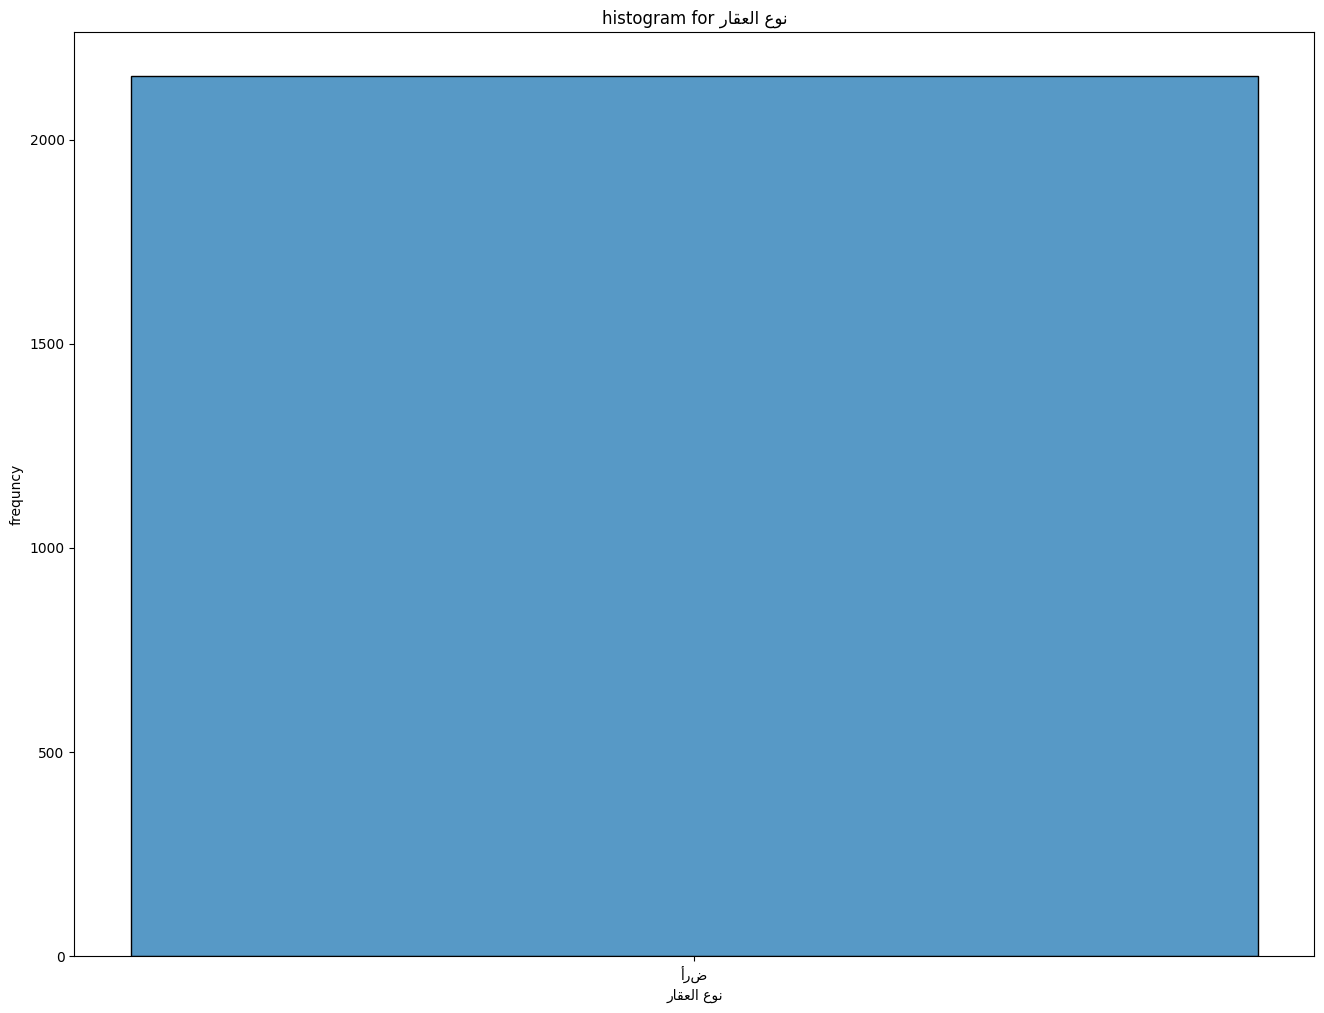

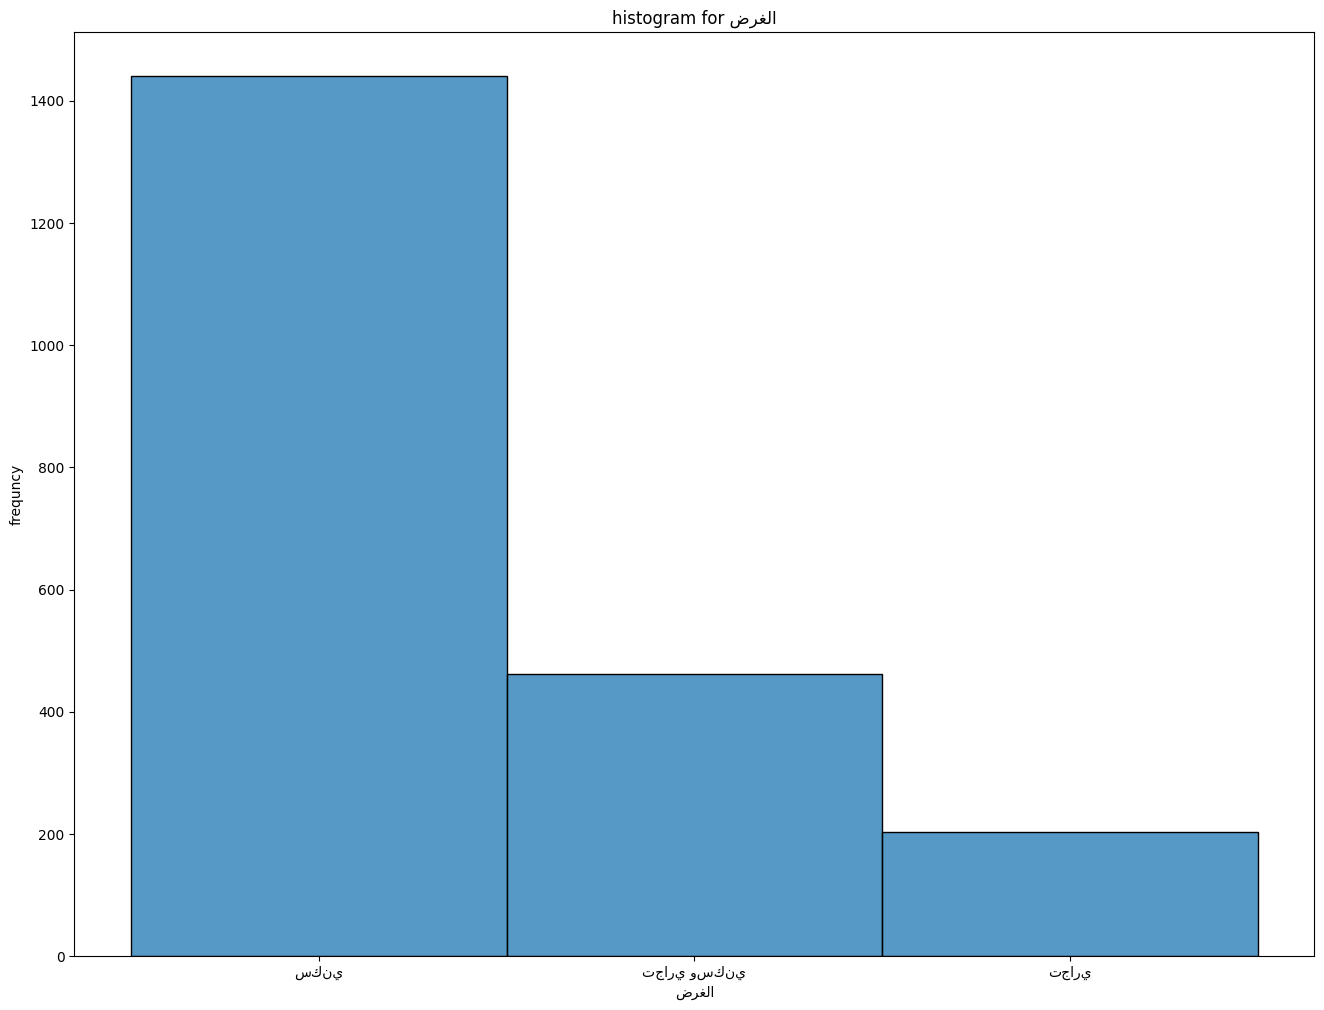

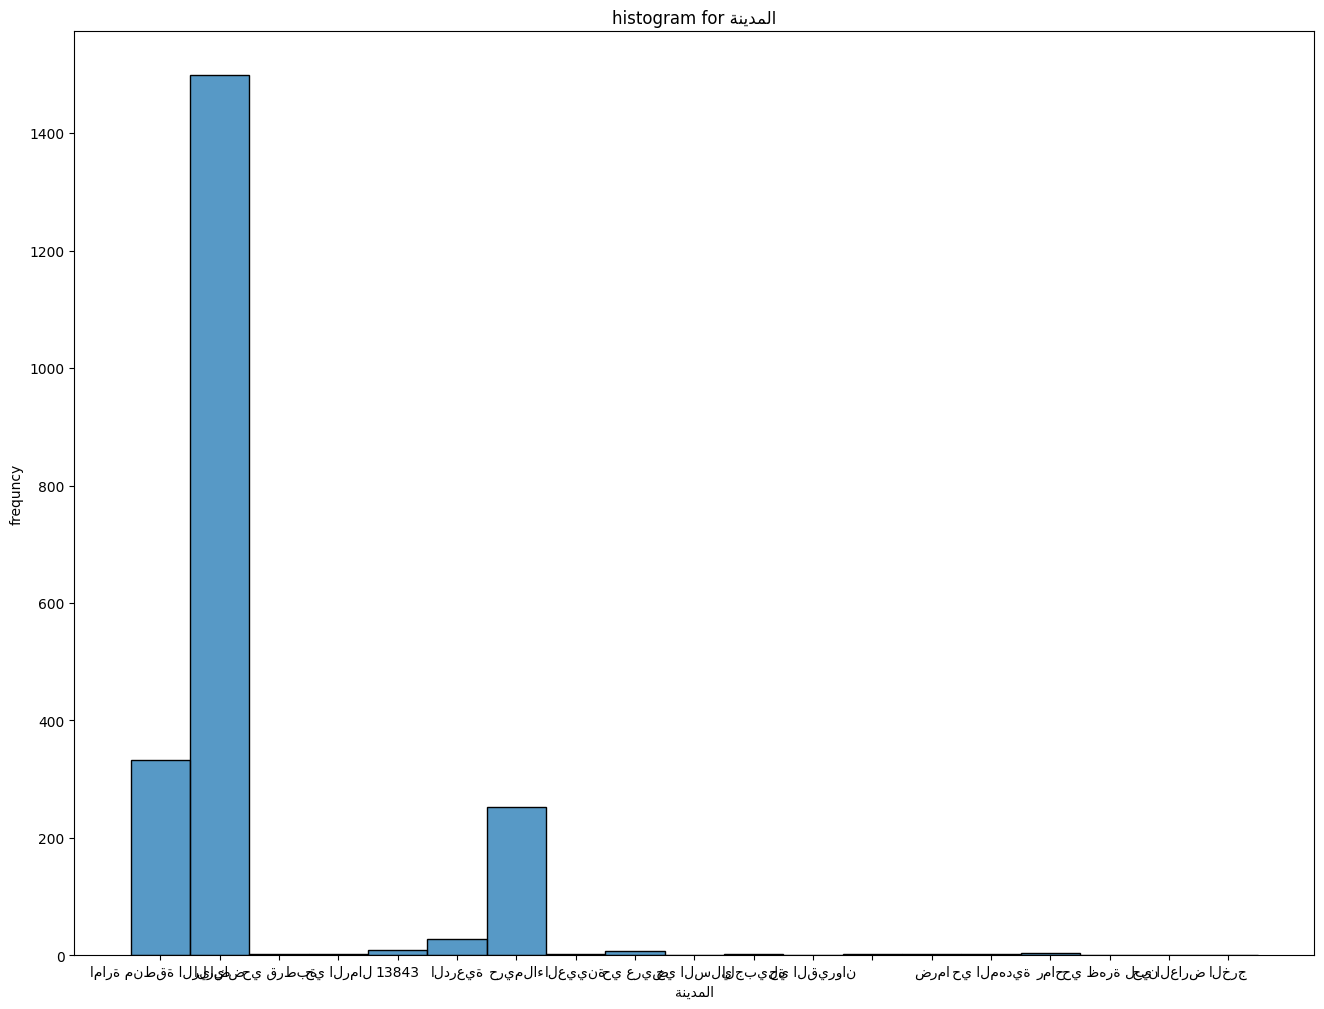

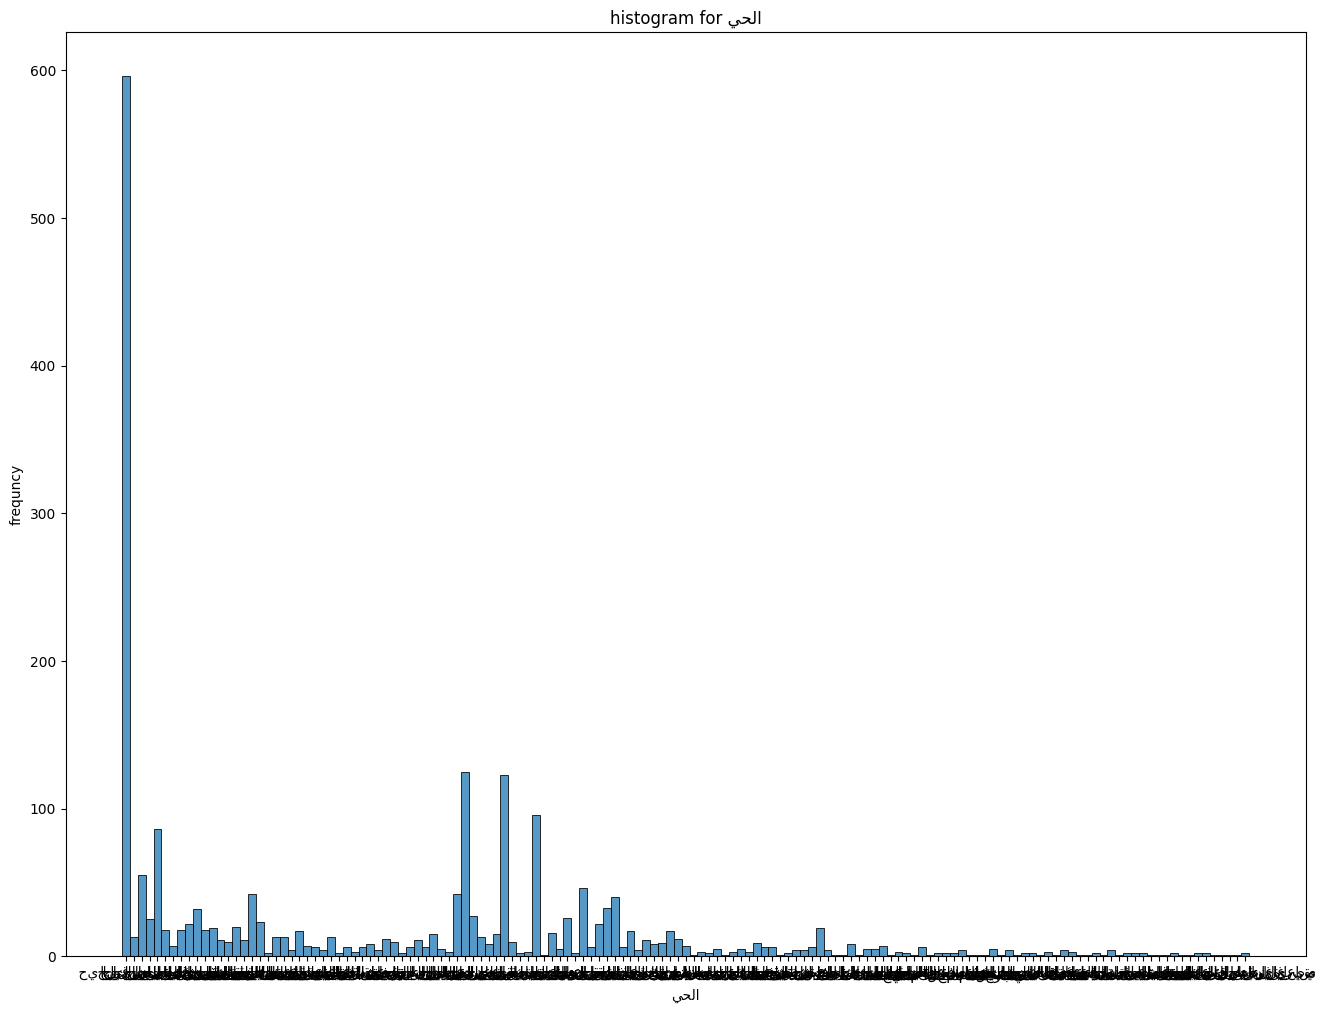

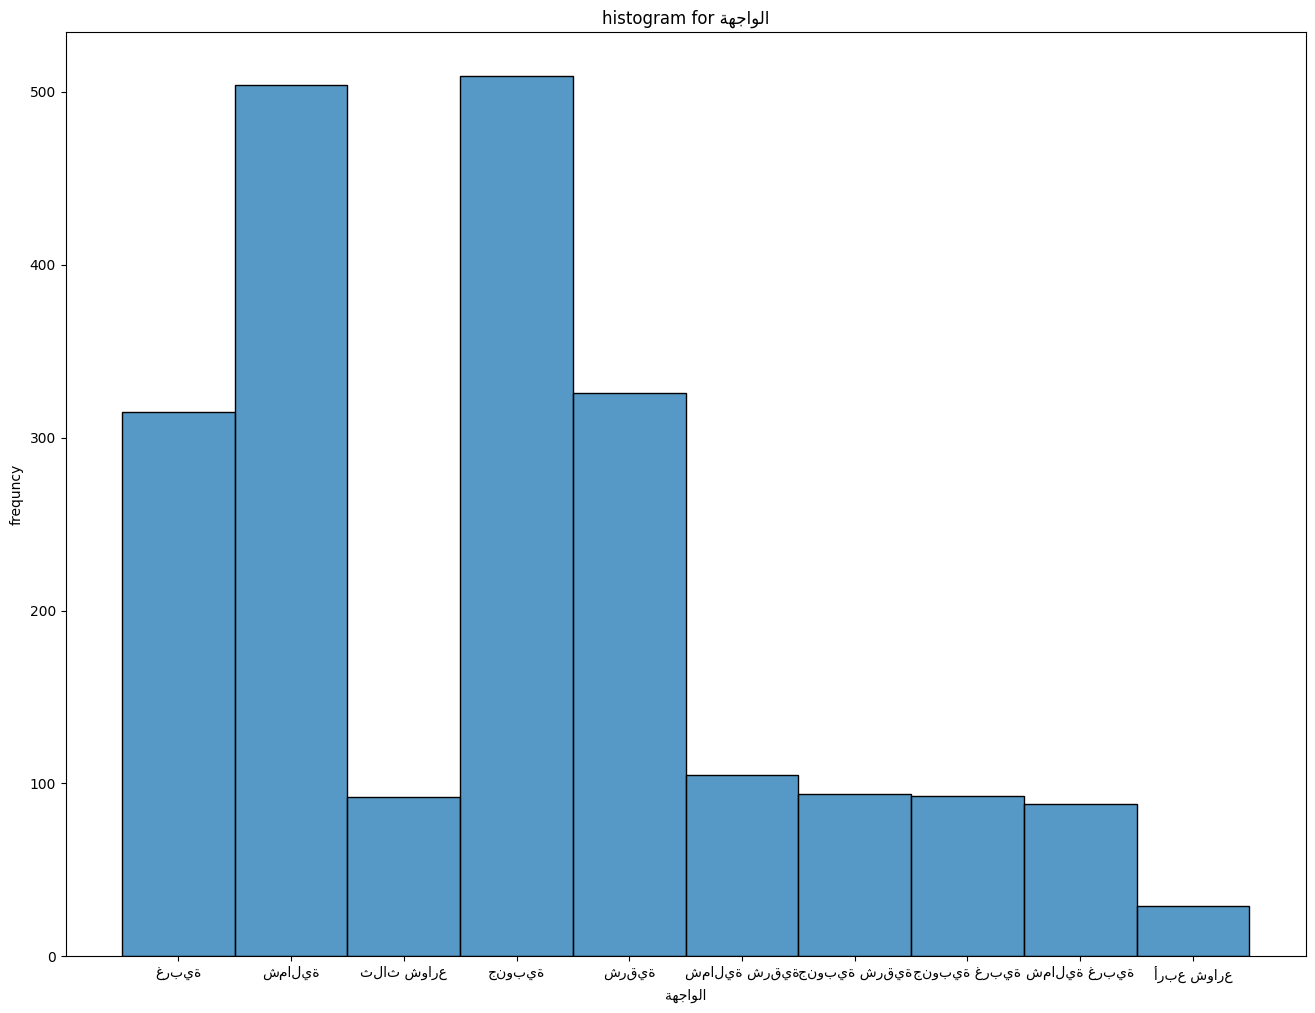

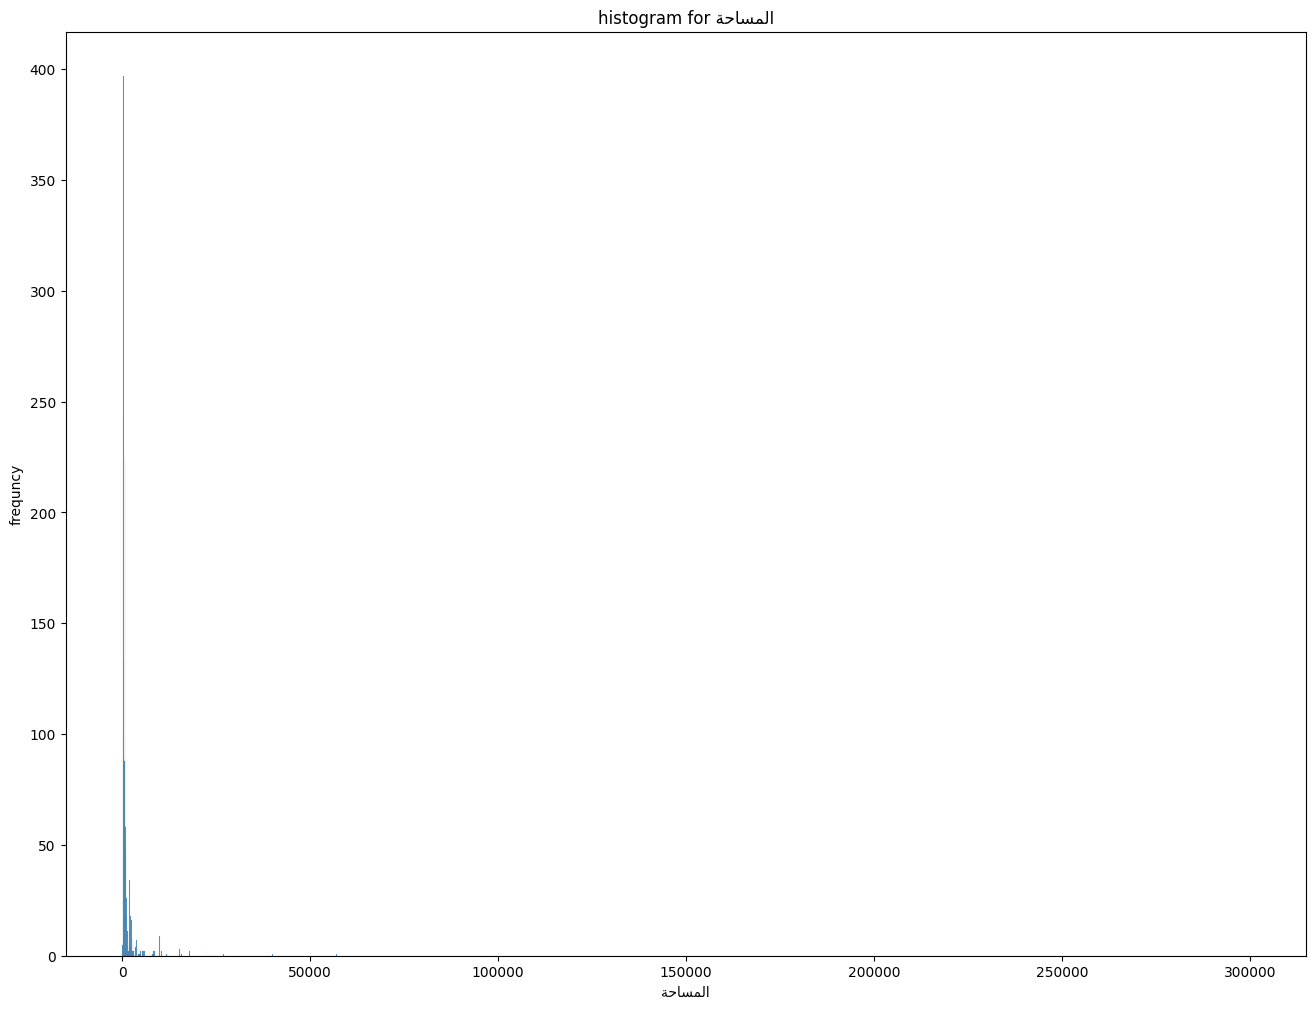

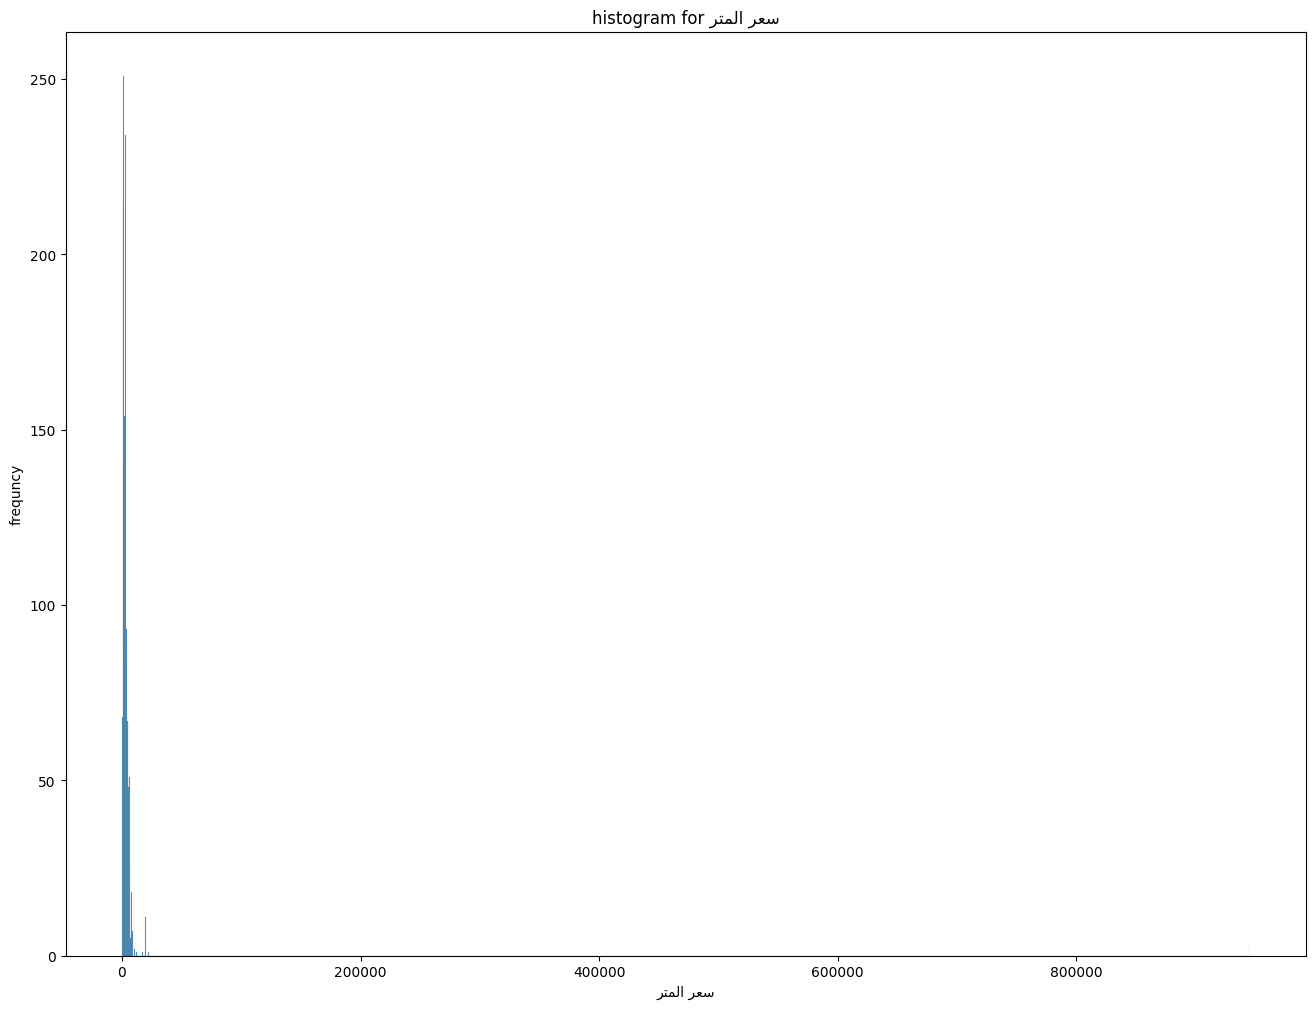

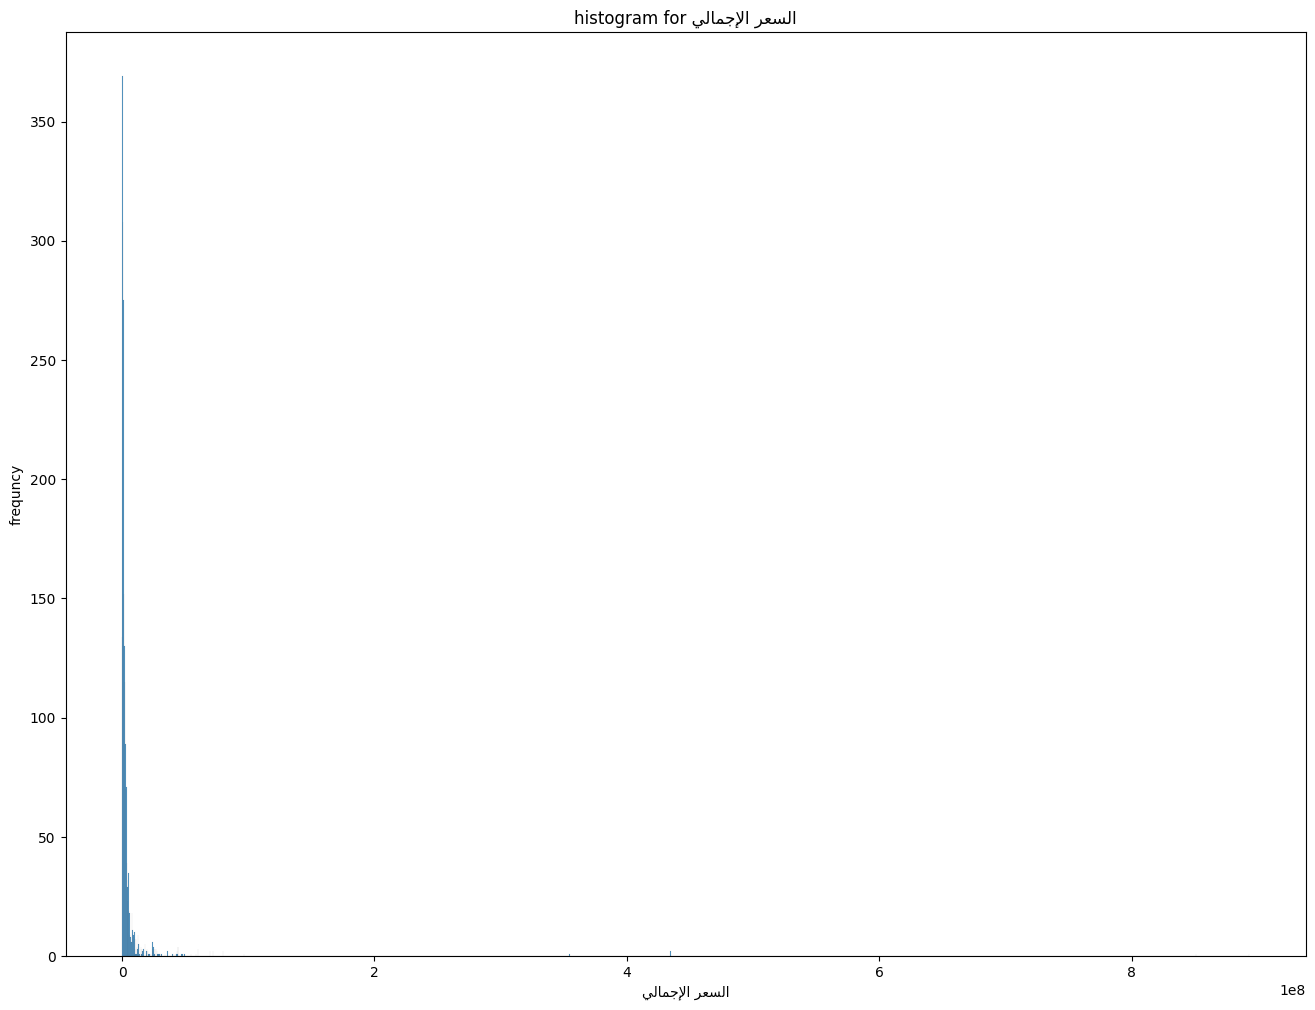

In [325]:
l = ['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة','سعر المتر', 'السعر الإجمالي']
     
for i in l:
    plt.figure(figsize=(16, 12))
    sns.histplot(df[i],edgecolor='black')
    plt.title(f'histogram for {get_display(arabic_reshaper.reshape(i))}')
    plt.xlabel(get_display(arabic_reshaper.reshape(i)))
    plt.ylabel('frequncy')

    plt.show()

In [326]:
city_l = ['امارة منطقة الرياض', 'الرياض', 'الرياض','13843']

# Ensure all strings in the DataFrame and city_l are stripped of leading/trailing whitespace
df['المدينة'] = df['المدينة'].str.strip()

# Strip whitespace from city_l elements as well
city_l = [city.strip() for city in city_l]
df['المدينة'] = df['المدينة'].map(lambda x: 'الرياض' if x in city_l else x)
df['المدينة'].unique()

array(['الرياض', 'حي قرطبة', 'حي الرمال', 'الدرعية', 'حريملاء', 'العيينة',
       'حي عريض', 'حي السلي', 'الجبيلة', 'حي القيروان', '', 'ضرما',
       'حي المهدية', 'رماح', 'حي ظهرة لبن', 'حي العارض', 'الخرج'],
      dtype=object)

In [327]:
df[df['المدينة'] == '13843']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي


In [328]:
df['الغرض'] = df['الغرض'].map(lambda x: 'غير معروف' if pd.isnull(x) else x)
df['الغرض'].unique()

array(['غير معروف', 'سكني', 'تجاري وسكني', 'تجاري'], dtype=object)

In [329]:
df['الحي'] = df['الحي'].map(lambda x: x.strip())
df_niberhood = df[df['الحي']  ==  '']
df_niberhood

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
192,أرض,تجاري,حي الرمال,,شرقية,360,2777.0,999720
304,أرض,تجاري وسكني,الرياض,,شمالية,343,2871.0,984753
990,أرض,سكني,الرياض,,جنوبية,450,4555.0,2049750
1051,أرض,سكني,حي الرمال,,شرقية,360,19780.0,7120800
1052,أرض,سكني,حي الرمال,,غربية,375,1201.0,450375
1263,أرض,تجاري وسكني,الرياض,,شمالية,450,1590.0,715500
1520,أرض,سكني,الرياض,,شمالية,343,2871.0,984753
1664,أرض,سكني,الرياض,,شمالية,1440,2450.0,3528000
2101,أرض,سكني,الرياض,,جنوبية,300,2950.0,885000
2102,أرض,سكني,الرياض,,شمالية غربية,838,500.0,419000


In [330]:
df['المدينة'].unique()
# df[df['المدينة'] == 'حي الرمال']
li = ['حي ظهرة لبن', 'حي الرمال' , 'حي قرطبة' , 'حي عريض','حي السلي', 'حي المهدية' , 'حي العارض' ,'حي القيروان', '' ]

df['الحي'] = np.where(df['الحي'] == '',df['المدينة'],df['الحي'])
df[df['المدينة'] == 'حي الرمال']


,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
192,أرض,تجاري,حي الرمال,حي الرمال,شرقية,360,2777.0,999720
1051,أرض,سكني,حي الرمال,حي الرمال,شرقية,360,19780.0,7120800
1052,أرض,سكني,حي الرمال,حي الرمال,غربية,375,1201.0,450375


In [331]:
df['المدينة'] = df['المدينة'].map(lambda x: 'الرياض' if x in li else x)
df['المدينة'].unique()

array(['الرياض', 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', 'ضرما',
       'رماح', 'الخرج'], dtype=object)

In [332]:
df['الحي'] = df['الحي'].str.strip()
df['الحي'].unique()

array(['الرياض', 'حي غرناطة', 'حي اليرموك', 'حي النسيم الغربي',
       'حي الرمال', 'حي الملك فيصل', 'حي المعيزلة', 'حي الشرق',
       'حي المونسية', 'حي الروضة', 'حي المشرق', 'حي الخليج', 'حي الشهداء',
       'حي الحمراء', 'حي البيان', 'حي قرطبة', 'حي القادسية', 'حي النهضة',
       'حي الصناعية القديمة', 'حي العلا', 'حي الجنادرية', 'حي المعيزيلة',
       'حي السعادة', 'حي النسيم الشرقي', 'حي خشم العان', 'حي الصفا',
       'حي اشبيلية', 'طريق سعيد ابن زيد', 'حي القدس', 'حي الاندلس',
       'حي الشعلة', 'حي الندوة', 'حي الفيحاء', 'امارة منطقة الرياض',
       'حي المنار', 'حي السلام', 'حي الزاهر', 'حي الجزيرة', 'حي النظيم',
       'حي الازدهار', 'حي الملز', 'حي العارض', 'حي النرجس', 'العيينة',
       'حي الملقا', 'حي الغنامية', 'حي عرقة', 'حي المهدية',
       'حي الدار البيضاء', 'حي سلطانة', 'حي الندى', 'حي ظهرة لبن',
       'حي العين', 'حي حطين', 'حي الهدا', 'حي طويق', 'حي المنصورة',
       'حي عريض', 'حي المناخ', 'حي القيروان', 'ضاحية نمار', 'حي الخير',
       'حي الصحافة', 'حي العوالي

In [333]:
df[df['الحي'] == 'الرياض']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,غير معروف,الرياض,الرياض,غربية,375,2900.0,1087500
9,أرض,تجاري وسكني,الرياض,الرياض,غربية,750,2600.0,1950000
10,أرض,تجاري وسكني,الرياض,الرياض,شمالية شرقية,900,580.0,522000
14,أرض,تجاري وسكني,الرياض,الرياض,جنوبية,1089,3300.0,3593700
22,أرض,تجاري وسكني,الرياض,الرياض,شمالية,361,2500.0,902500
...,...,...,...,...,...,...,...,...
2136,أرض,تجاري وسكني,رماح,الرياض,غربية,630,1270.0,800100
2137,أرض,تجاري وسكني,رماح,الرياض,شرقية,750,1500.0,1125000
2138,أرض,تجاري وسكني,رماح,الرياض,شمالية,500,4300.0,2150000
2140,أرض,سكني,حريملاء,الرياض,غربية,750,2000.0,1500000


In [334]:
df[df['الحي'] == 'حي القيروان']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
397,أرض,تجاري وسكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000
399,أرض,تجاري وسكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000
488,أرض,سكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000
649,أرض,سكني,الرياض,حي القيروان,شمالية,900,5700.0,5130000
657,أرض,سكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000
658,أرض,سكني,الرياض,حي القيروان,شمالية,900,422.0,379800
681,أرض,سكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000
772,أرض,تجاري,الرياض,حي القيروان,غربية,600,6400.0,3840000
784,أرض,سكني,الرياض,حي القيروان,غربية,600,6350.0,3810000
819,أرض,سكني,الرياض,حي القيروان,شمالية,900,6000.0,5400000


In [335]:
df['الحي'] = df['الحي'].map(lambda x: 'غير معروف' if x == 'الرياض' else x)
df[df['الحي'] == 'غير معروف']


,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,غير معروف,الرياض,غير معروف,غربية,375,2900.0,1087500
9,أرض,تجاري وسكني,الرياض,غير معروف,غربية,750,2600.0,1950000
10,أرض,تجاري وسكني,الرياض,غير معروف,شمالية شرقية,900,580.0,522000
14,أرض,تجاري وسكني,الرياض,غير معروف,جنوبية,1089,3300.0,3593700
22,أرض,تجاري وسكني,الرياض,غير معروف,شمالية,361,2500.0,902500
...,...,...,...,...,...,...,...,...
2136,أرض,تجاري وسكني,رماح,غير معروف,غربية,630,1270.0,800100
2137,أرض,تجاري وسكني,رماح,غير معروف,شرقية,750,1500.0,1125000
2138,أرض,تجاري وسكني,رماح,غير معروف,شمالية,500,4300.0,2150000
2140,أرض,سكني,حريملاء,غير معروف,غربية,750,2000.0,1500000


In [336]:
almost_clean = df.copy()

almost_clean

df['الحي'].unique()



array(['غير معروف', 'حي غرناطة', 'حي اليرموك', 'حي النسيم الغربي',
       'حي الرمال', 'حي الملك فيصل', 'حي المعيزلة', 'حي الشرق',
       'حي المونسية', 'حي الروضة', 'حي المشرق', 'حي الخليج', 'حي الشهداء',
       'حي الحمراء', 'حي البيان', 'حي قرطبة', 'حي القادسية', 'حي النهضة',
       'حي الصناعية القديمة', 'حي العلا', 'حي الجنادرية', 'حي المعيزيلة',
       'حي السعادة', 'حي النسيم الشرقي', 'حي خشم العان', 'حي الصفا',
       'حي اشبيلية', 'طريق سعيد ابن زيد', 'حي القدس', 'حي الاندلس',
       'حي الشعلة', 'حي الندوة', 'حي الفيحاء', 'امارة منطقة الرياض',
       'حي المنار', 'حي السلام', 'حي الزاهر', 'حي الجزيرة', 'حي النظيم',
       'حي الازدهار', 'حي الملز', 'حي العارض', 'حي النرجس', 'العيينة',
       'حي الملقا', 'حي الغنامية', 'حي عرقة', 'حي المهدية',
       'حي الدار البيضاء', 'حي سلطانة', 'حي الندى', 'حي ظهرة لبن',
       'حي العين', 'حي حطين', 'حي الهدا', 'حي طويق', 'حي المنصورة',
       'حي عريض', 'حي المناخ', 'حي القيروان', 'ضاحية نمار', 'حي الخير',
       'حي الصحافة', 'حي العو

In [337]:
north = ['حي النرجس', 'حي الملقا',
         'حي النخيل', 'حي العقيق', 'حي الياسمين', 'حي النفل',
         'حي الفلاح', 'حي الندى', 'حي الصحافة', 
         'حي المحمدية', 'حي العارض',
         'حي التعاون', 'حي الوادي',
         'حي الربيع', 'العيينة', 
         'حي النزهة', 'حي القيروان', 
         'حي المصيف', 'حي الرحمانية', ]
south = ['حي الندوة', 'حي المعيزيلة', 'حي الفاروق',
         'حي الخالدية', 'حي الزهراء', 'حي المناخ',
         'حي احد', 'حي الاسكان', 'حي الدار البيضاء', 'حي العزيزية']
west = ['حي الشفا', 'حي طيبة', 'حي السويدي الغربي' , 'حي لبن', 'حي العريجاء الوسطى', 
        'حي العريجاء الغربية', 'حي الحزم', 'حي هجرة لبن', 
        'حي الرفيعة', 'حي العوالي', 'حي العريجاء الغربي', 
        'حي طويق', 'حي ظهرة البديعة', 'حي نمار', 
        'حي ظهرة لبن', 'حي المهدية']


df['المنطقة'] = df['الحي'].apply(lambda x: 'شمال الرياض' if x in north else 'شرق الرياض')
df.loc[df['الحي'].isin(west), 'المنطقة'] = 'غرب الرياض'
df.loc[df['الحي'].isin(south), 'المنطقة'] = 'جنوب الرياض'
df.loc[df['الحي'] == 'غير معروف', 'المنطقة'] = 'غير معروف'

In [338]:
df['المدينة'].unique()

array(['الرياض', 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', 'ضرما',
       'رماح', 'الخرج'], dtype=object)

In [339]:
df

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,المنطقة
0,أرض,غير معروف,الرياض,غير معروف,غربية,375,2900.0,1087500,غير معروف
1,أرض,غير معروف,الرياض,حي غرناطة,شمالية,800,4800.0,3840000,شرق الرياض
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000,شرق الرياض
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000,شرق الرياض
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000,شرق الرياض
...,...,...,...,...,...,...,...,...,...
2150,أرض,تجاري,الرياض,غير معروف,جنوبية,2000,3500.0,7000000,غير معروف
2151,أرض,سكني,الرياض,حي العريجاء الغربية,جنوبية,400,1500.0,600000,غرب الرياض
2152,أرض,تجاري وسكني,الرياض,حي ظهرة لبن,جنوبية غربية,1050,2380.0,2499000,غرب الرياض
2153,أرض,تجاري وسكني,الرياض,حي العريجاء الغربي,غربية,313,2000.0,626000,غرب الرياض


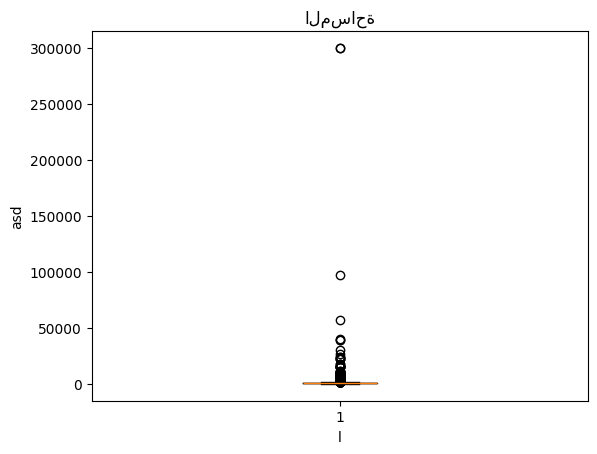

In [340]:
plt.boxplot(df['المساحة'])

plt.title('المساحة')
plt.xlabel('l')
plt.ylabel('asd')
plt.show()

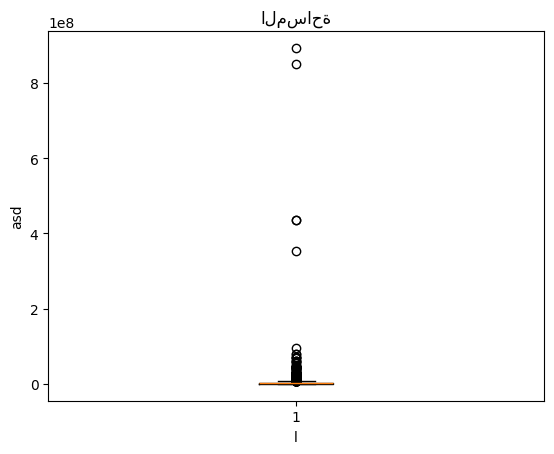

In [341]:
plt.boxplot(df['السعر الإجمالي'])

plt.title('المساحة')
plt.xlabel('l')
plt.ylabel('asd')
plt.show()

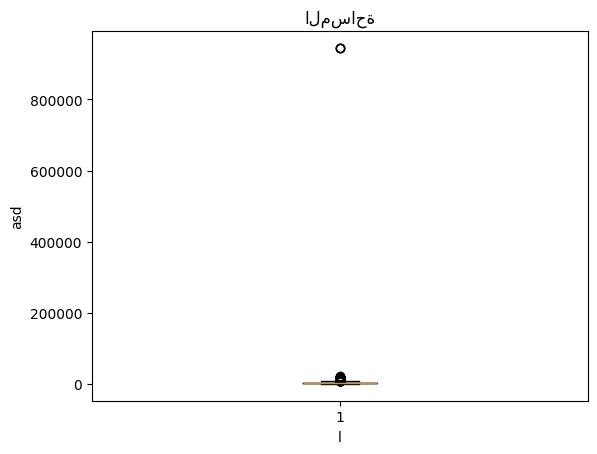

In [342]:
plt.boxplot(df['سعر المتر'])

plt.title('المساحة')
plt.xlabel('l')
plt.ylabel('asd')
plt.show()

In [343]:
df[df['المدينة'] == 'حريملاء']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,المنطقة
329,أرض,غير معروف,حريملاء,غير معروف,شرقية,435,4900.0,2131500,غير معروف
344,أرض,غير معروف,حريملاء,غير معروف,شمالية,375,1520.0,570000,غير معروف
345,أرض,غير معروف,حريملاء,غير معروف,شمالية غربية,7500,2000.0,15000000,غير معروف
361,أرض,سكني,حريملاء,غير معروف,شرقية,750,3000.0,2250000,غير معروف
369,أرض,سكني,حريملاء,غير معروف,شمالية,375,1200.0,450000,غير معروف
...,...,...,...,...,...,...,...,...,...
2091,أرض,سكني,حريملاء,حي الخير,شمالية,625,2150.0,1343750,شرق الرياض
2133,أرض,سكني,حريملاء,القرينه,جنوبية غربية,630,1000.0,630000,شرق الرياض
2135,أرض,تجاري وسكني,حريملاء,ملهم,غربية,630,1270.0,800100,شرق الرياض
2140,أرض,سكني,حريملاء,غير معروف,غربية,750,2000.0,1500000,غير معروف


In [344]:
df[(df['المدينة'] == 'حريملاء') & (df['سعر المتر'] > 8000) ]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,المنطقة
1031,أرض,سكني,حريملاء,غير معروف,شمالية غربية,414,9000.0,3726000,غير معروف
1032,أرض,سكني,حريملاء,غير معروف,جنوبية,630,9000.0,5670000,غير معروف
1132,أرض,سكني,حريملاء,غير معروف,جنوبية,420,10000.0,4200000,غير معروف
1133,أرض,سكني,حريملاء,غير معروف,جنوبية,375,10000.0,3750000,غير معروف
1134,أرض,سكني,حريملاء,غير معروف,شمالية,375,10000.0,3750000,غير معروف
1135,أرض,سكني,حريملاء,غير معروف,غربية,2100,10000.0,21000000,غير معروف
1545,أرض,تجاري وسكني,حريملاء,ملهم,شمالية شرقية,945,945000.0,893025000,شرق الرياض
1546,أرض,تجاري وسكني,حريملاء,غير معروف,غربية,375,945000.0,354375000,غير معروف
1571,أرض,سكني,حريملاء,غير معروف,شرقية,1800,22500.0,40500000,غير معروف
1808,أرض,سكني,حريملاء,غير معروف,غربية,375,9000.0,3375000,غير معروف


In [345]:
outlier_condition = (df['المدينة'] == 'حريملاء') & (df['سعر المتر'] > 20000)

nonOotlier = df[(df['المدينة'] == 'حريملاء') & (df['سعر المتر'] < 20000)]

harimla_avg_price = nonOotlier['سعر المتر'].mean()



df.loc[outlier_condition, 'سعر المتر'] = harimla_avg_price


df['السعر الإجمالي'] = df['سعر المتر'] * df['المساحة']



df[df['سعر المتر'] > 50000]

nonOotlier


,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,المنطقة
329,أرض,غير معروف,حريملاء,غير معروف,شرقية,435,4900.0,2131500,غير معروف
344,أرض,غير معروف,حريملاء,غير معروف,شمالية,375,1520.0,570000,غير معروف
345,أرض,غير معروف,حريملاء,غير معروف,شمالية غربية,7500,2000.0,15000000,غير معروف
361,أرض,سكني,حريملاء,غير معروف,شرقية,750,3000.0,2250000,غير معروف
369,أرض,سكني,حريملاء,غير معروف,شمالية,375,1200.0,450000,غير معروف
...,...,...,...,...,...,...,...,...,...
2091,أرض,سكني,حريملاء,حي الخير,شمالية,625,2150.0,1343750,شرق الرياض
2133,أرض,سكني,حريملاء,القرينه,جنوبية غربية,630,1000.0,630000,شرق الرياض
2135,أرض,تجاري وسكني,حريملاء,ملهم,غربية,630,1270.0,800100,شرق الرياض
2140,أرض,سكني,حريملاء,غير معروف,غربية,750,2000.0,1500000,غير معروف


In [346]:
outlier_condition = (df['الحي'] == 'حي القيروان') & (df['سعر المتر'] > 200000)

noOutlier = df[(df['الحي'] == 'حي القيروان') & (df['سعر المتر'] < 200000)]

Q_avg_price = noOutlier['سعر المتر'].mean()


df.loc[outlier_condition, 'سعر المتر'] = Q_avg_price


df['السعر الإجمالي'] = df['سعر المتر'] * df['المساحة']



df[df['سعر المتر'] > 50000]
nonOotlier['سعر المتر'].max()

10000.0

In [347]:
df[df['سعر المتر'] > 10000]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,المنطقة
659,أرض,غير معروف,الرياض,غير معروف,شمالية,1672,15000.0,25080000.0,غير معروف
1041,أرض,سكني,الرياض,حي الياسمين,شمالية,910,19780.0,17999800.0,شمال الرياض
1042,أرض,سكني,الرياض,حي الياسمين,شمالية,2172,19780.0,42962160.0,شمال الرياض
1043,أرض,سكني,الرياض,حي ثليم,جنوبية غربية,333,19780.0,6586740.0,شرق الرياض
1044,أرض,سكني,الرياض,حي ثليم,شرقية,2227,19780.0,44050060.0,شرق الرياض
1045,أرض,سكني,الرياض,حي ثليم,شرقية,2227,19780.0,44050060.0,شرق الرياض
1046,أرض,سكني,الرياض,ضاحية نمار,شرقية,2227,19780.0,44050060.0,شرق الرياض
1047,أرض,سكني,الرياض,ضاحية نمار,شمالية شرقية,2215,19780.0,43812700.0,شرق الرياض
1048,أرض,سكني,الرياض,ضاحية نمار,جنوبية,2200,19780.0,43516000.0,شرق الرياض
1049,أرض,سكني,الرياض,ضاحية نمار,جنوبية شرقية,2200,19780.0,43516000.0,شرق الرياض


In [348]:
df_forchart = df.copy()

columes = ['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة']

columns = [col.strip() for col in columes]

for i in columes:
    df_forchart[i] = df_forchart[i].map(lambda x: get_display(arabic_reshaper.reshape(x)) if isinstance(x, str) else x)

In [349]:
lower_bound = df_forchart['المساحة'].quantile(0.05)
upper_bound = df_forchart['المساحة'].quantile(0.95)


outliers = (df_forchart['المساحة'] < lower_bound) | (df_forchart['المساحة'] > upper_bound)


aqar_df_cleaned = df_forchart[~outliers]
lower_bound = df_forchart['السعر الإجمالي'].quantile(0.02)
upper_bound = df_forchart['السعر الإجمالي'].quantile(0.98)


outliers = (df_forchart['السعر الإجمالي'] < lower_bound) | (df_forchart['السعر الإجمالي'] > upper_bound)


df_forchart = df_forchart[~outliers]

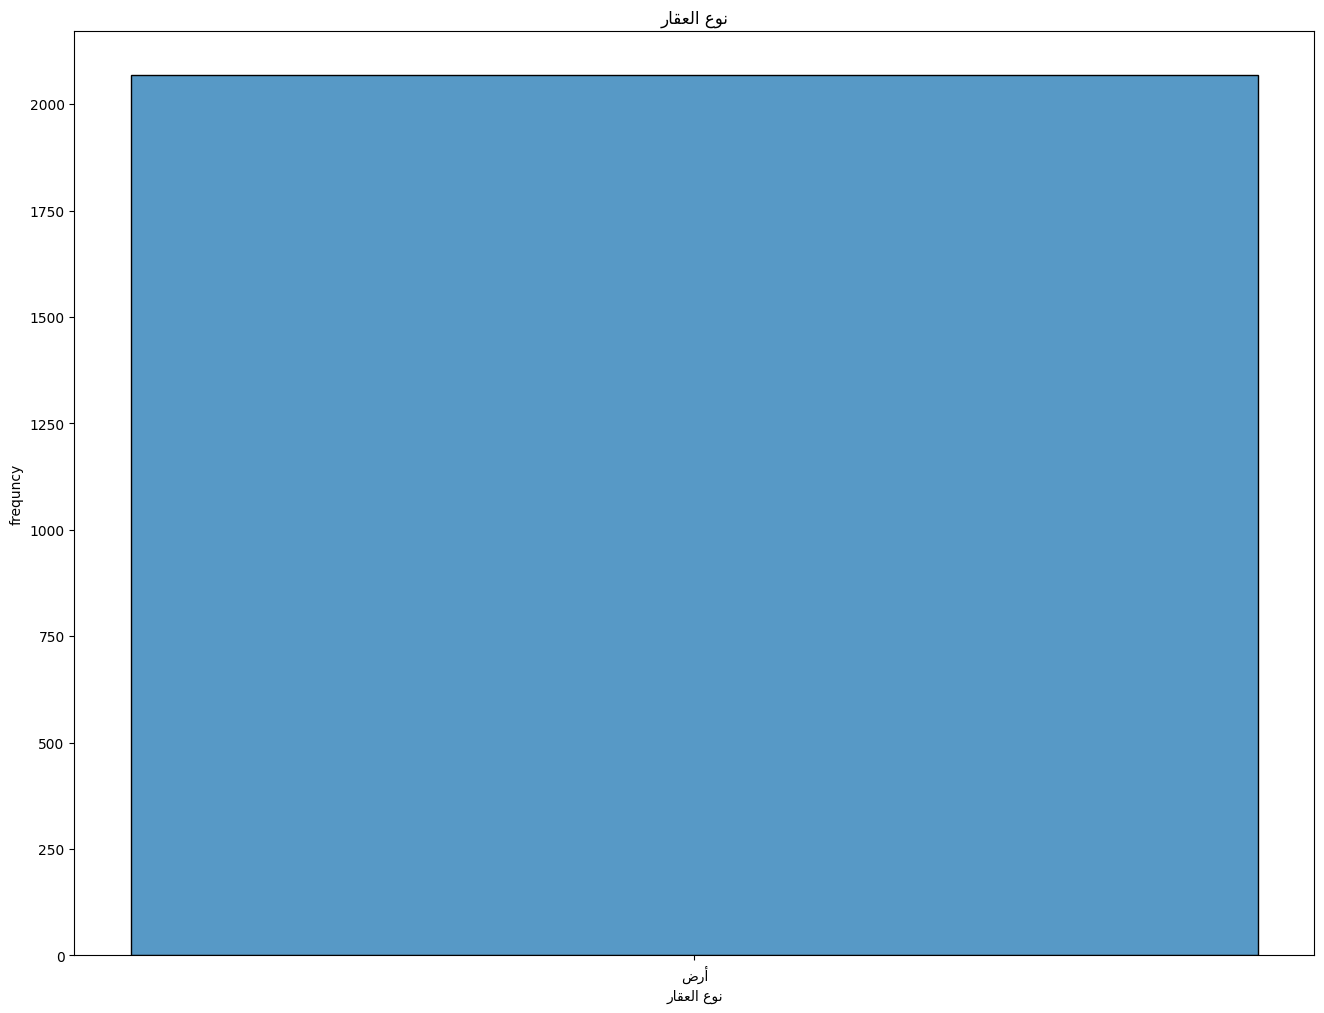

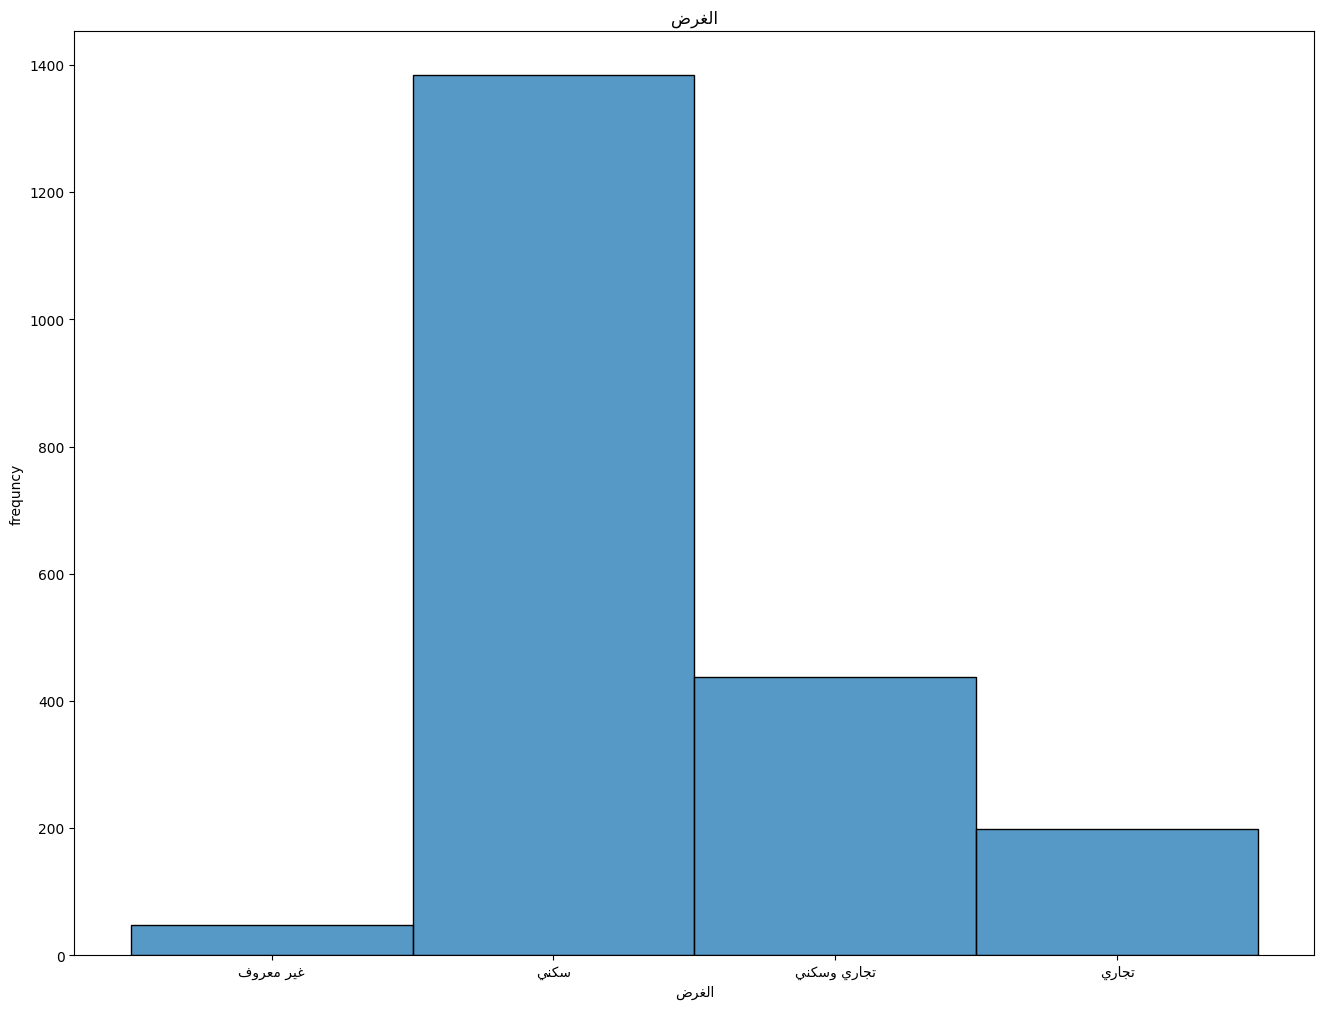

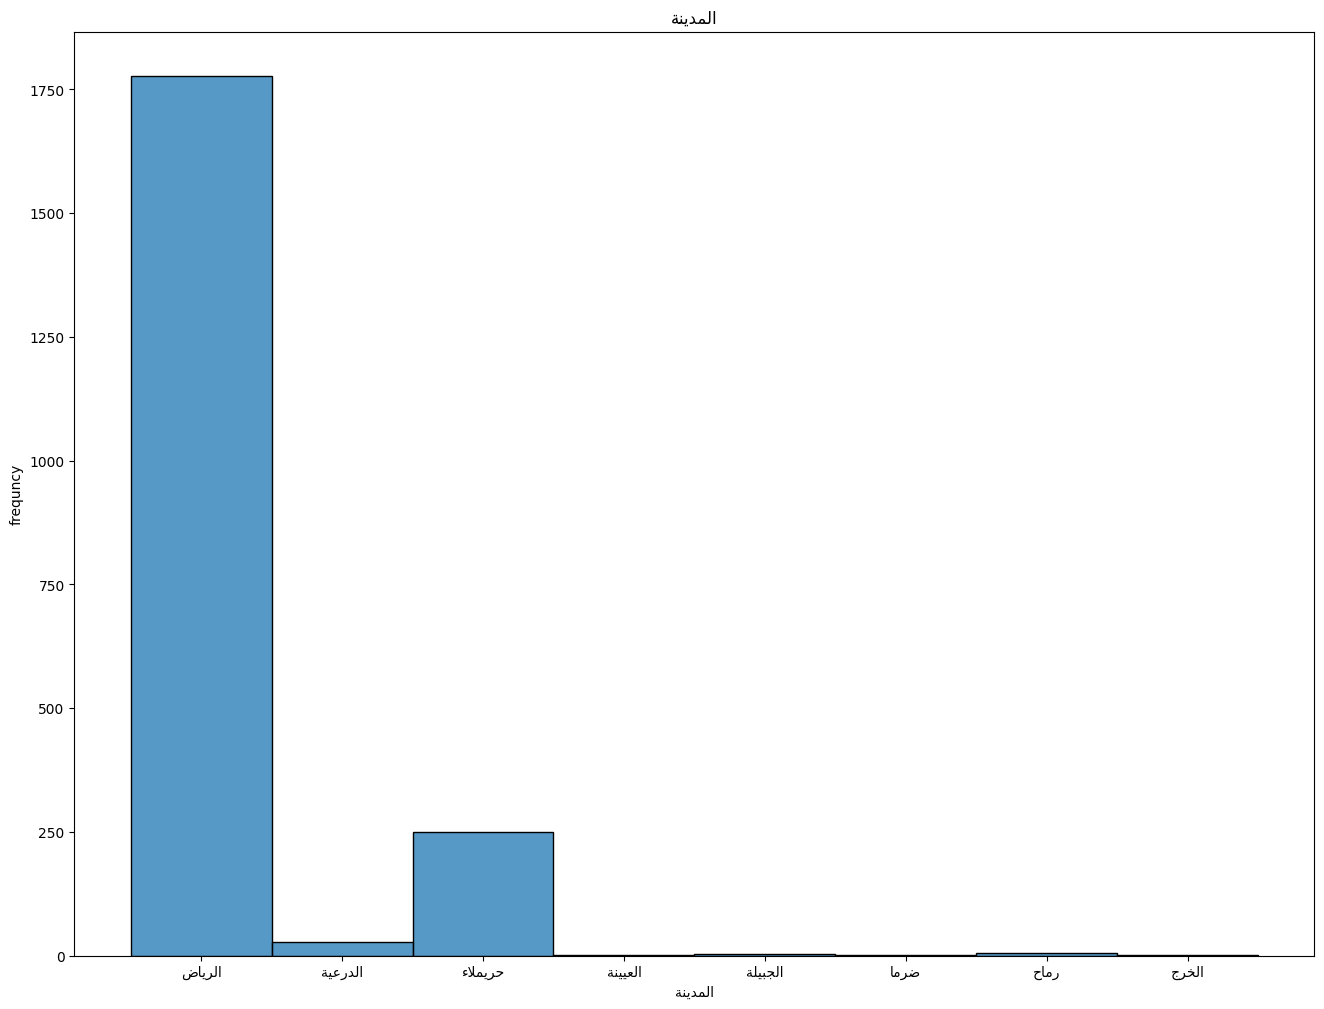

c:\Users\osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


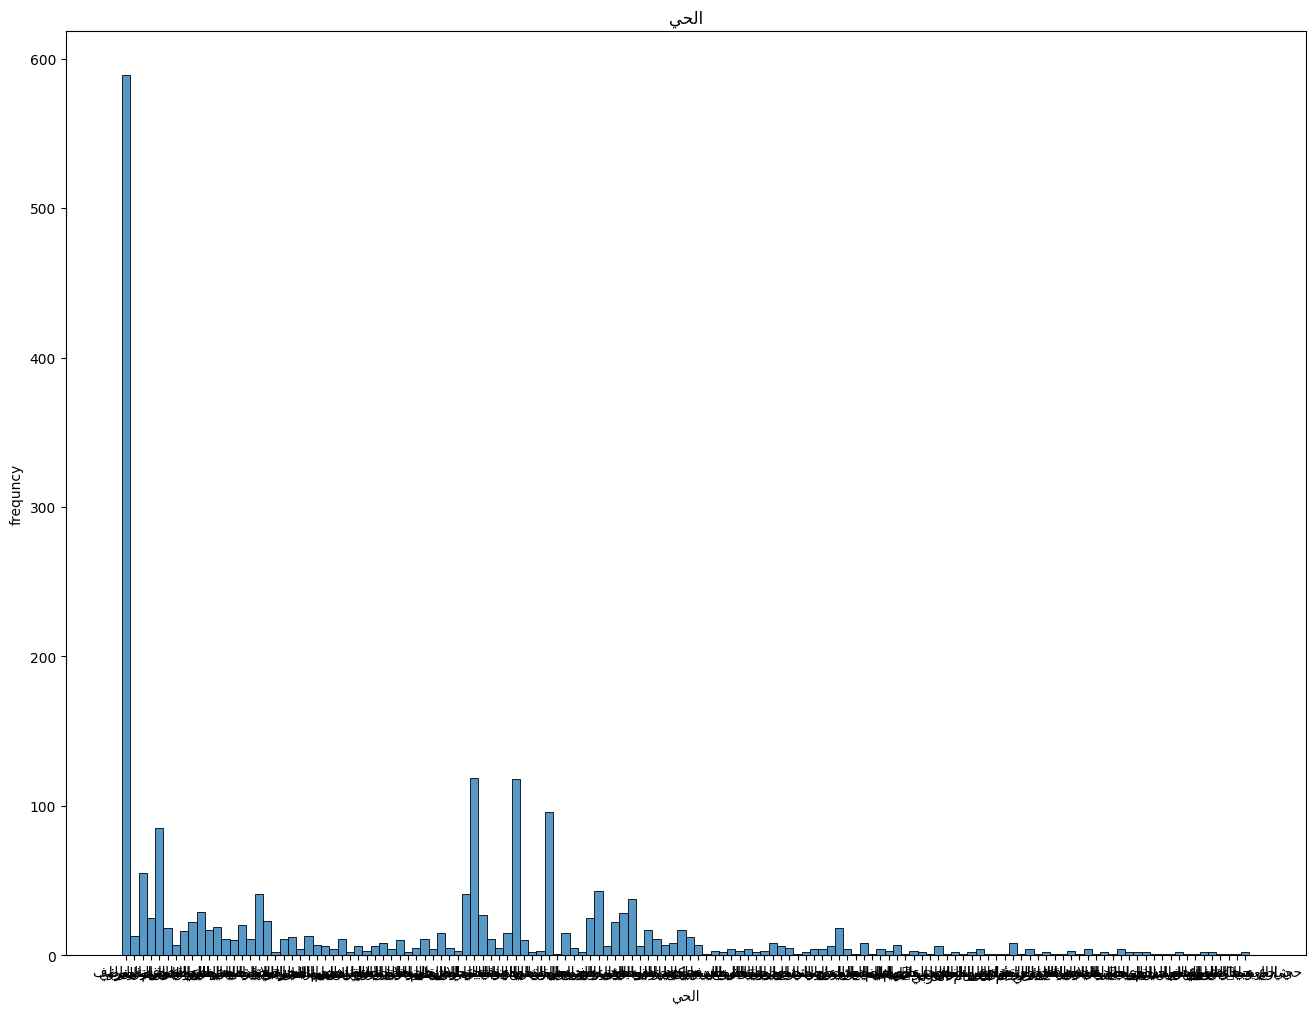

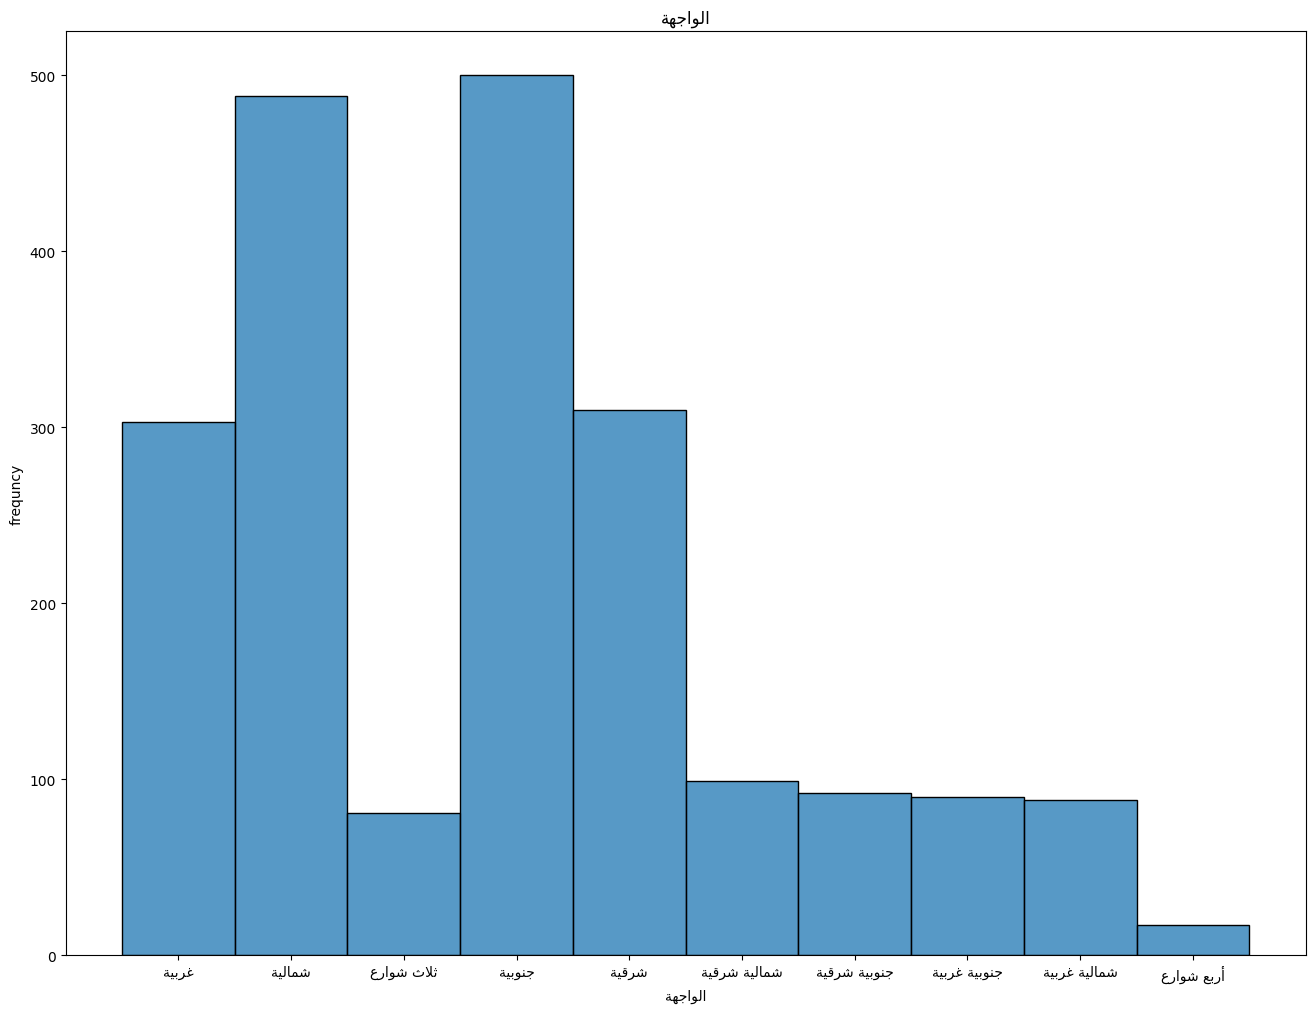

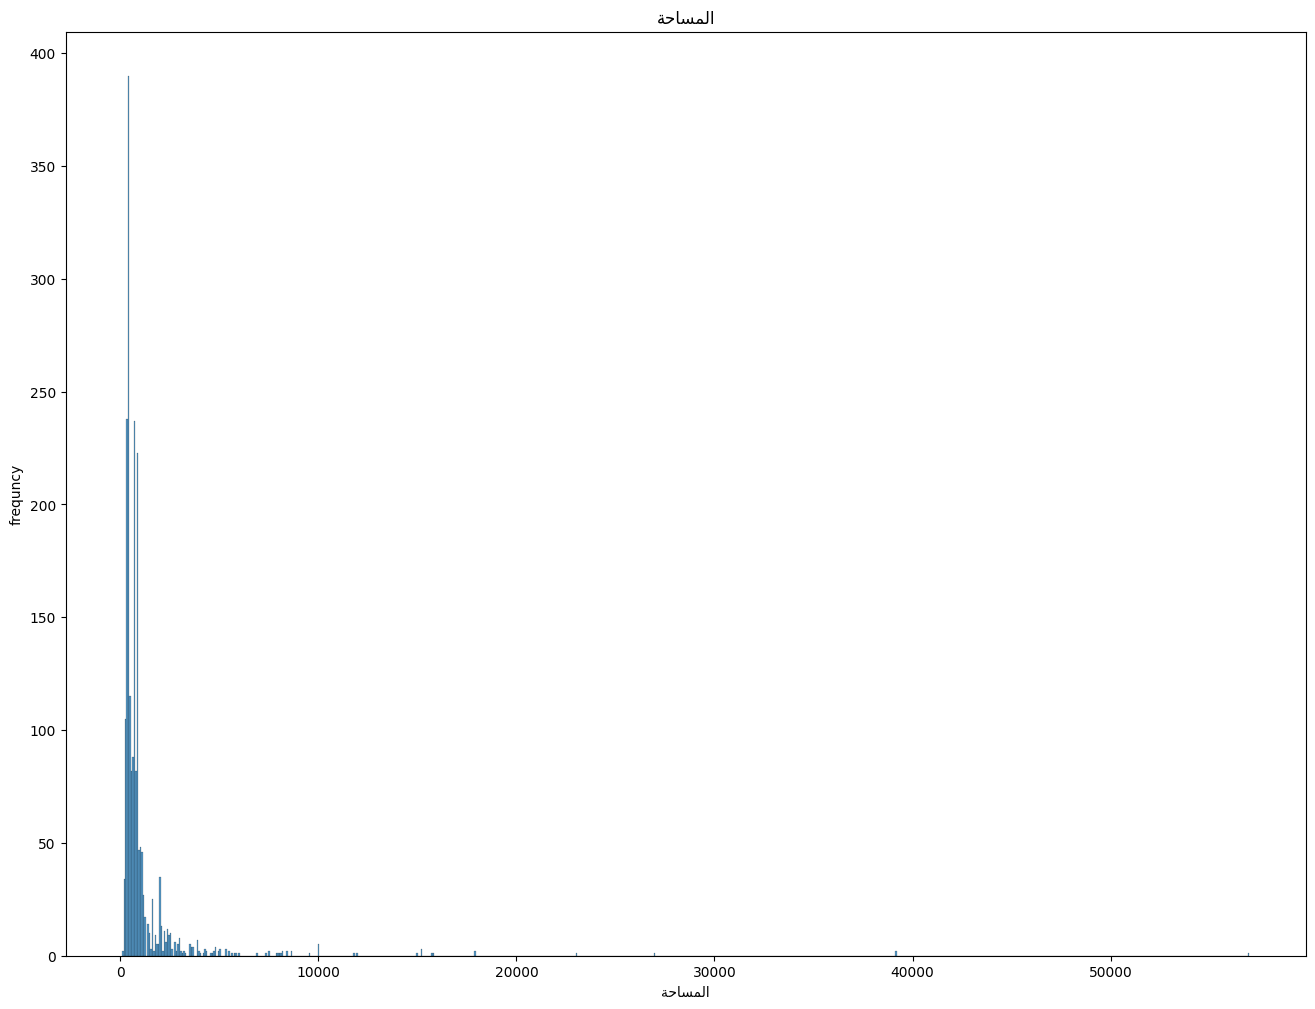

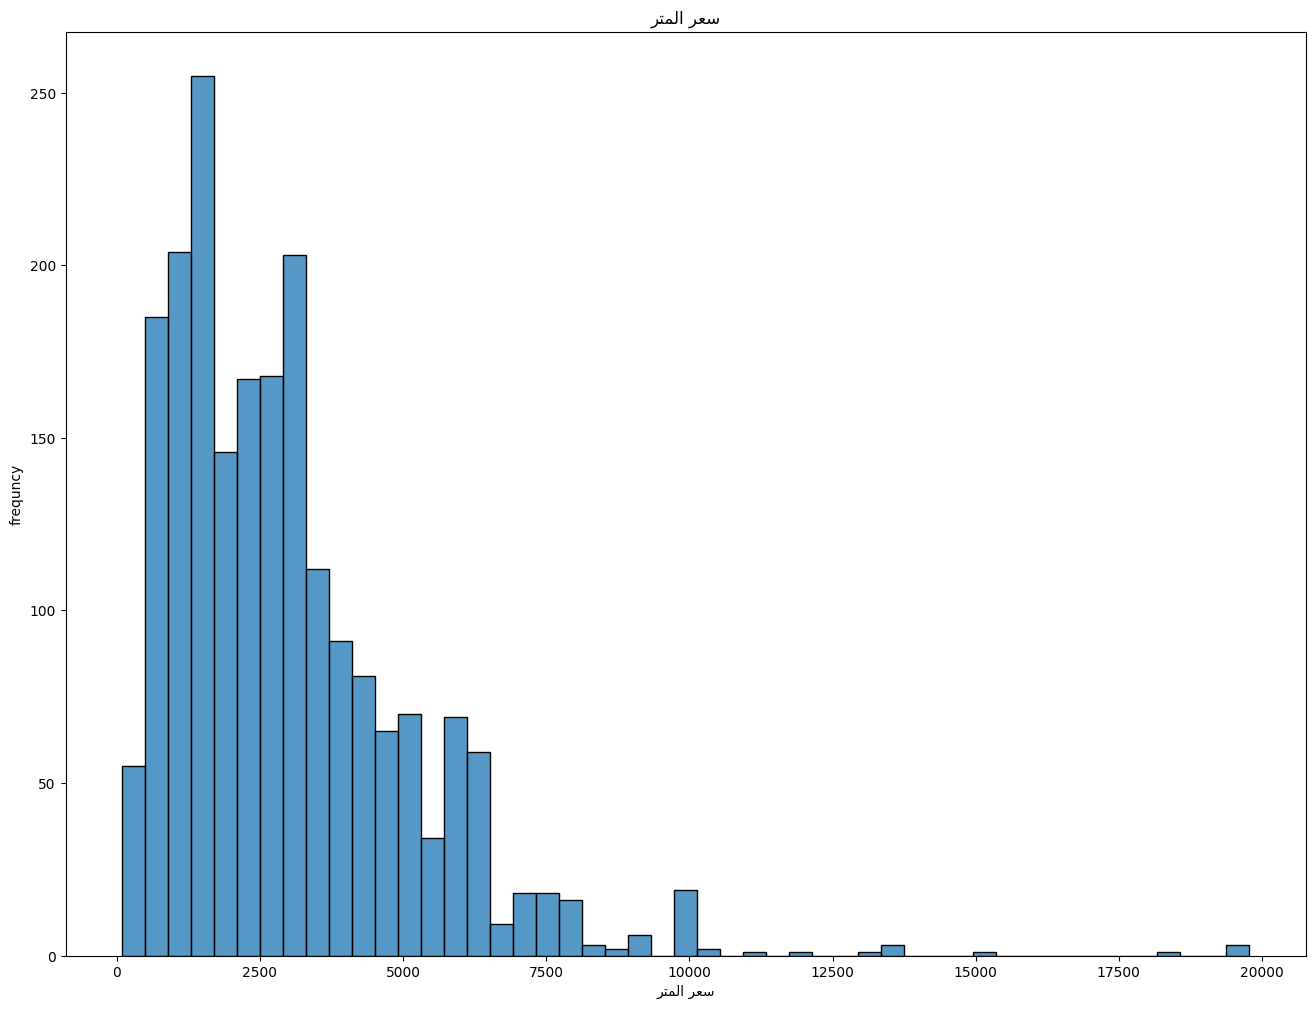

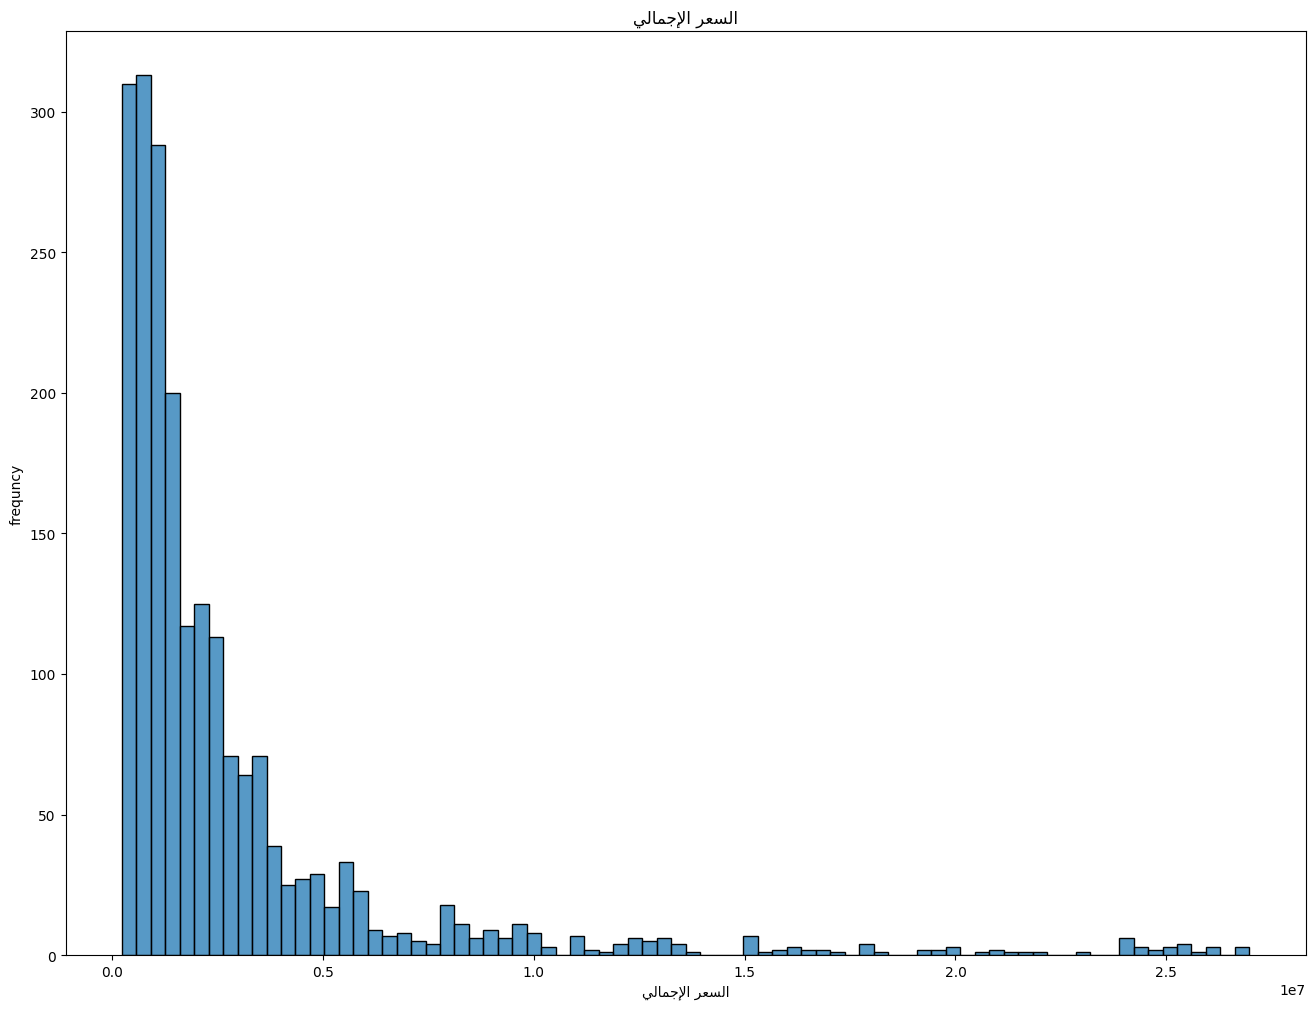

In [350]:
l = ['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة','سعر المتر', 'السعر الإجمالي']
     
for i in l:
    plt.figure(figsize=(16, 12))
    sns.histplot(df_forchart[i],edgecolor='black')
    plt.title(f'{get_display(arabic_reshaper.reshape(i))}')
    plt.xlabel(get_display(arabic_reshaper.reshape(i)))
    plt.ylabel('frequncy')

    plt.show()

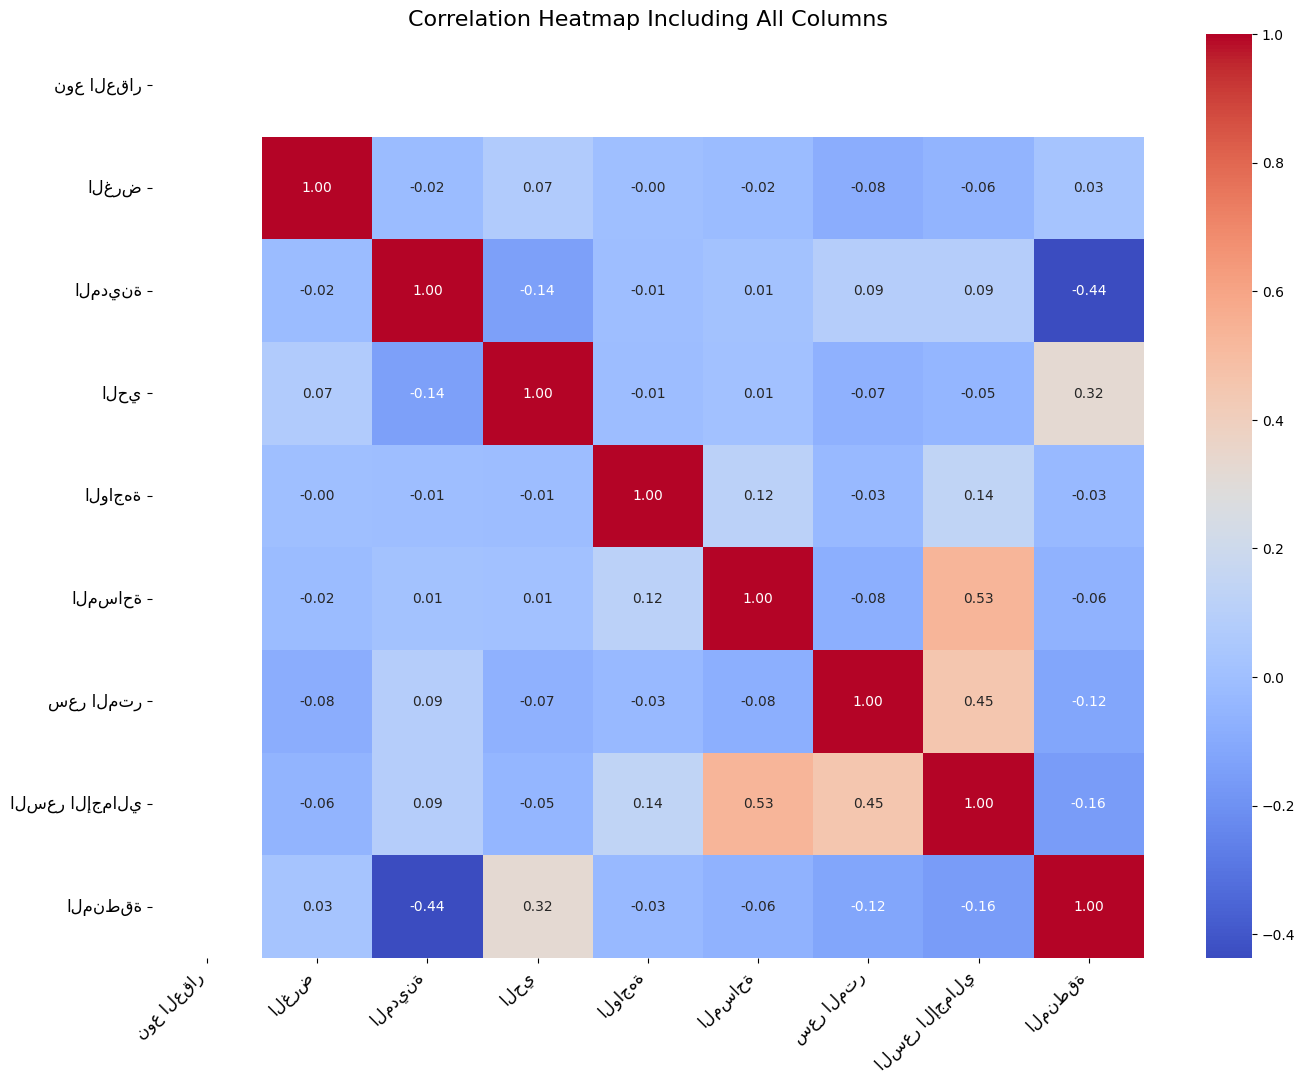

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df_encoded = df_forchart.copy()


label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    label_encoders[column] = le


correlation_matrix = df_encoded.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})


plt.title("Correlation Heatmap Including All Columns", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)


plt.show()


In [398]:
import plotly.express as px


l = ['غير معروف', 'غرب الرياض', 'جنوب الرياض' , '  شمال الرياض']

li = [col.strip() for col in l]


df_filtered = df[~df["المنطقة"].isin(li)]

average_price_by_region = df_filtered.groupby("الحي")["السعر الإجمالي"].mean().reset_index()


fig = px.bar(
    average_price_by_region.head(15),
    x='الحي',
    y='السعر الإجمالي',
    title="    متوسط اسعار أحياء الشرق للأراضي",
    color='الحي',
    width=2000,
    height=700
)


fig.show()
